In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = 'https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Loan%20Application%20Status/loan_prediction.csv'
df = pd.read_csv(url)
df

,LP001002,Male,No,0,Graduate,No.1,5849,0.1,Unnamed: 8,360,1,Urban,Y
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
609,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
610,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
611,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
#columns name since not there
columns = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
           'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount', 'Loan_Amount_Term',
           'Credit_History', 'Property_Area', 'Loan_Status']


In [4]:
url = 'https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Loan%20Application%20Status/loan_prediction.csv'
df = pd.read_csv(url, header=None, names=columns)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
df.shape

(614, 13)

In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   Loan_Amount        592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
Loan_Amount          22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Loan_Amount'].fillna(df['Loan_Amount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   Loan_Amount        614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
Loan_Amount          0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

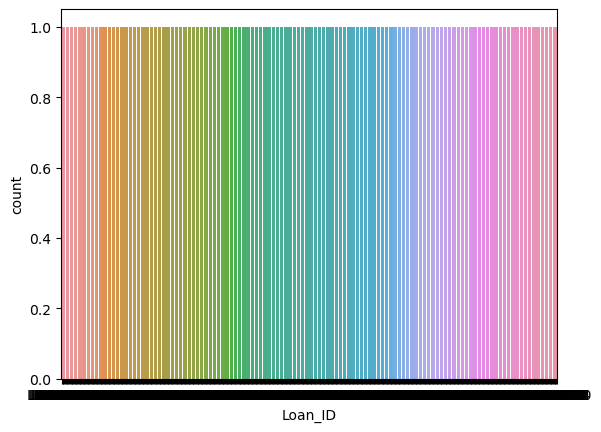

In [12]:
sns.countplot(x='Loan_ID', data=df)
plt.show()

In [13]:
df.drop(columns=['Loan_ID'], inplace=True)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [14]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [15]:
df.drop(columns=['ApplicantIncome', 'CoapplicantIncome'], inplace=True)
df

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,146.412162,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,128.000000,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,66.000000,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,120.000000,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,141.000000,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,71.000000,360.0,1.0,Rural,Y,2900.0
610,Male,Yes,3+,Graduate,No,40.000000,180.0,1.0,Rural,Y,4106.0
611,Male,Yes,1,Graduate,No,253.000000,360.0,1.0,Urban,Y,8312.0
612,Male,Yes,2,Graduate,No,187.000000,360.0,1.0,Urban,Y,7583.0


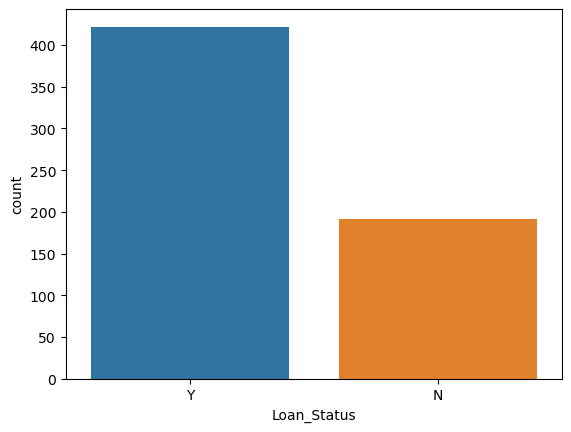

In [16]:
sns.countplot(x='Loan_Status', data=df)
plt.show()

In [17]:
loan_status_counts = df['Loan_Status'].value_counts(normalize=True) * 100
loan_status_counts

Loan_Status
Y    68.729642
N    31.270358
Name: proportion, dtype: float64

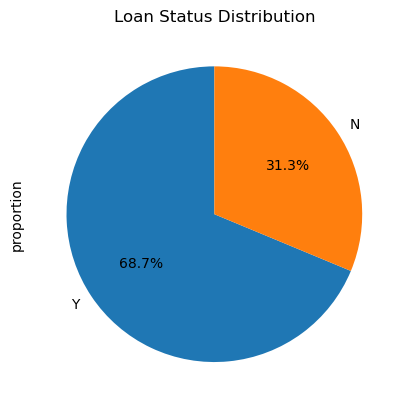

In [18]:
loan_status_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#1f77b4', '#ff7f0e'])
plt.title('Loan Status Distribution')
plt.show()

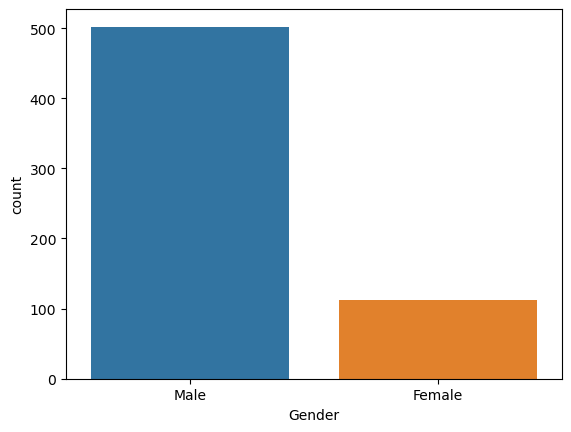

Gender
Male      81.758958
Female    18.241042
Name: proportion, dtype: float64

In [19]:
sns.countplot(x='Gender', data=df)
plt.show()
Gender_counts = df['Gender'].value_counts(normalize=True) * 100
Gender_counts

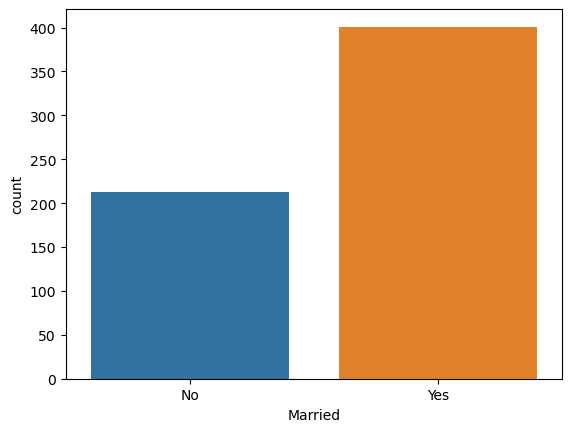

Married
Yes    65.309446
No     34.690554
Name: proportion, dtype: float64

In [20]:
sns.countplot(x='Married', data=df)
plt.show()
Married_counts = df['Married'].value_counts(normalize=True) * 100
Married_counts

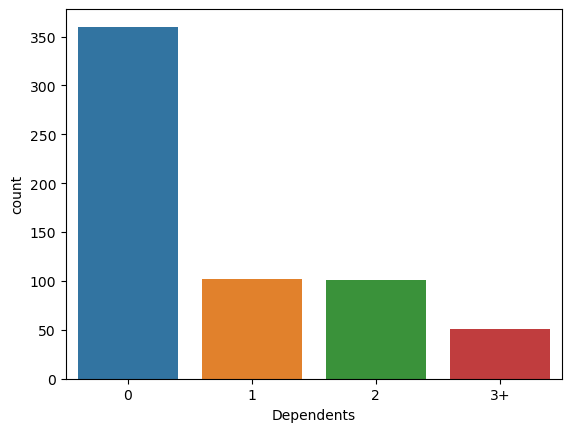

Dependents
0     58.631922
1     16.612378
2     16.449511
3+     8.306189
Name: proportion, dtype: float64

In [21]:
sns.countplot(x='Dependents', data=df)
plt.show()
Dependents_counts = df['Dependents'].value_counts(normalize=True) * 100
Dependents_counts

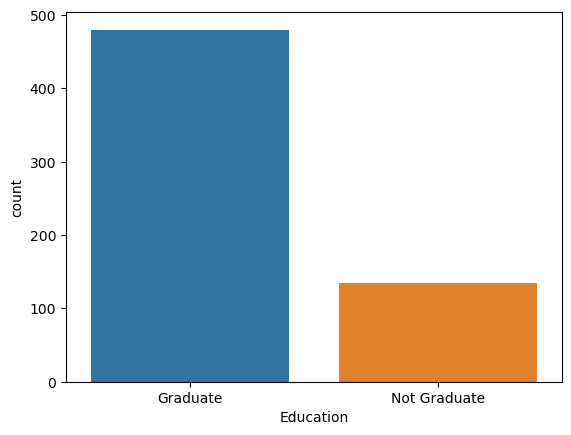

Education
Graduate        78.175896
Not Graduate    21.824104
Name: proportion, dtype: float64

In [22]:
sns.countplot(x='Education', data=df)
plt.show()
Education_counts = df['Education'].value_counts(normalize=True) * 100
Education_counts

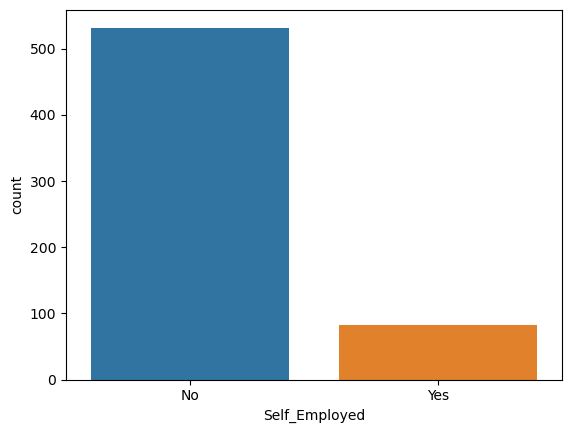

Self_Employed
No     86.644951
Yes    13.355049
Name: proportion, dtype: float64

In [23]:
sns.countplot(x='Self_Employed', data=df)
plt.show()
Self_Employed_counts = df['Self_Employed'].value_counts(normalize=True) * 100
Self_Employed_counts

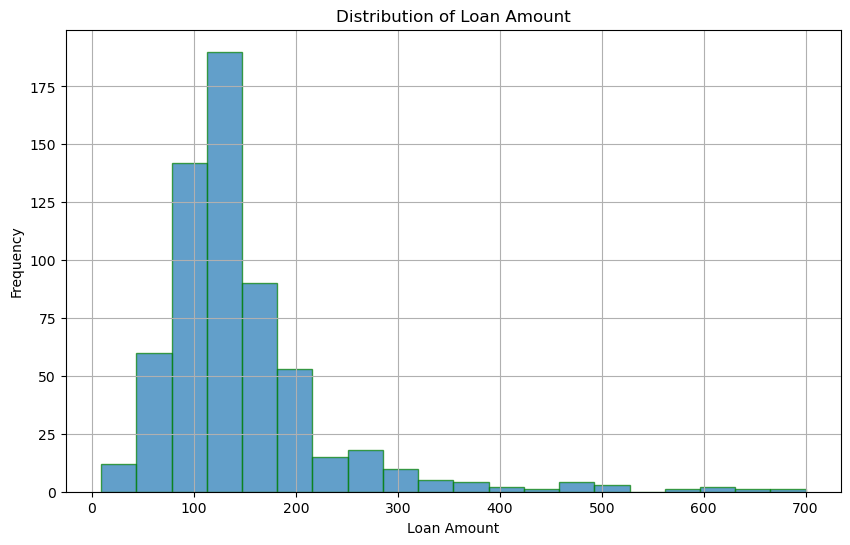

In [24]:
plt.figure(figsize=(10, 6))
plt.hist(df['Loan_Amount'], bins=20, edgecolor='g', alpha=0.7)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [25]:
max_loan_amount = df['Loan_Amount'].max()
min_loan_amount = df['Loan_Amount'].min()
print(f"Maximum Loan Amount: {max_loan_amount}")
print(f"Minimum Loan Amount: {min_loan_amount}")

Maximum Loan Amount: 700.0
Minimum Loan Amount: 9.0


In [26]:
most_frequent_loan_amount = df['Loan_Amount'].mode()[0]
f" The loan amount that is asked for the majority of times is: {most_frequent_loan_amount}"

' The loan amount that is asked for the majority of times is: 146.41216216216216'

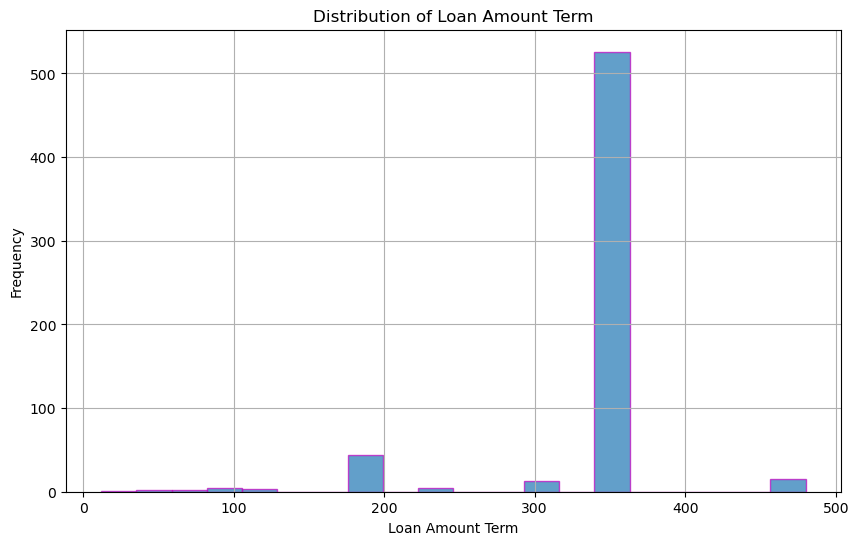

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(df['Loan_Amount_Term'], bins=20, edgecolor='m', alpha=0.7)
plt.title('Distribution of Loan Amount Term')
plt.xlabel('Loan Amount Term')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [28]:
max_loan_term = df['Loan_Amount_Term'].max()
min_loan_term = df['Loan_Amount_Term'].min()
print(f"Maximum Loan Term: {max_loan_term}")
print(f"Minimum Loan Term: {min_loan_term}")

Maximum Loan Term: 480.0
Minimum Loan Term: 12.0


In [29]:
most_frequent_loan_term = df['Loan_Amount_Term'].mode()[0]
print(f"The loan Term that is asked for the majority of times is: {most_frequent_loan_term}")

The loan Term that is asked for the majority of times is: 360.0


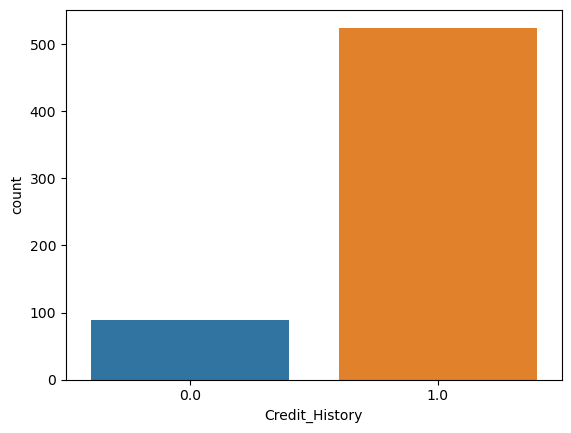

In [30]:
sns.countplot(x='Credit_History', data=df)
plt.show()

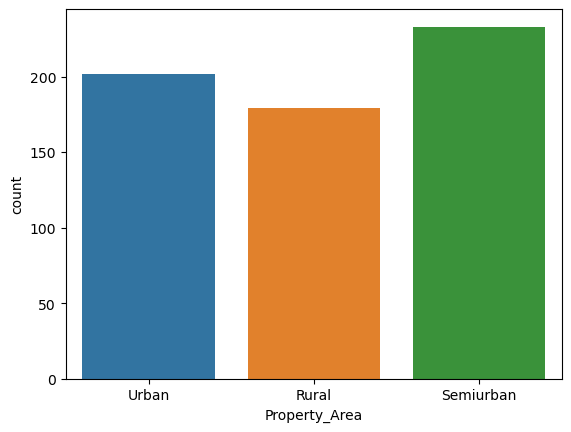

Property_Area
Semiurban    37.947883
Urban        32.899023
Rural        29.153094
Name: proportion, dtype: float64

In [31]:
sns.countplot(x='Property_Area', data=df)
plt.show()
Property_Area_counts = df['Property_Area'].value_counts(normalize=True) * 100
Property_Area_counts

In [32]:
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical Columns:",categorical_col)

numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical Columns:",numerical_col)


Categorical Columns: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
Numerical Columns: ['Loan_Amount', 'Loan_Amount_Term', 'Credit_History', 'Total_Income']


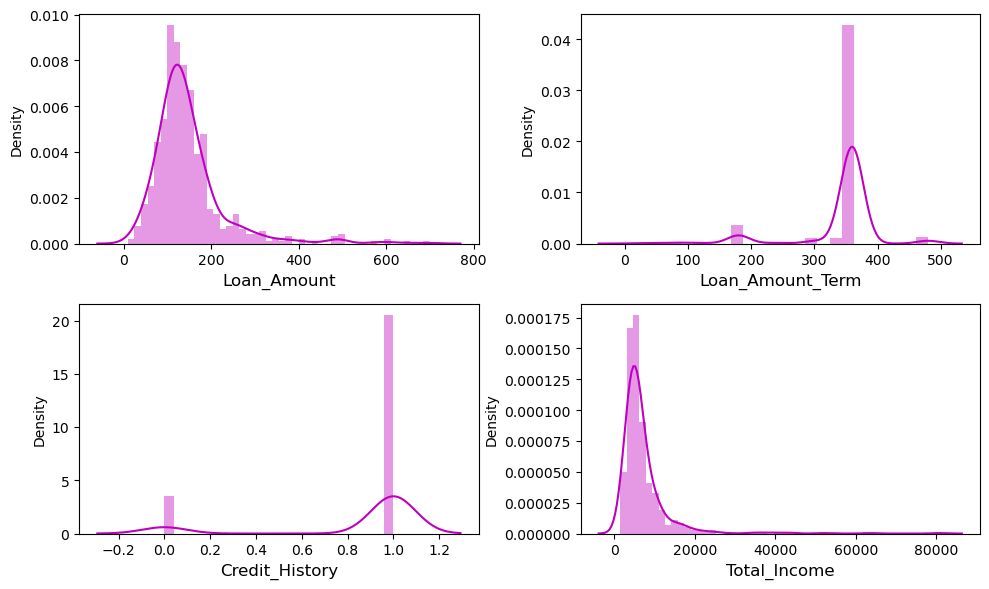

In [33]:
plt.figure(figsize = (10,6), facecolor="white")
plotnumber= 1
for col in numerical_col:
    if plotnumber<=4:
        ax = plt.subplot (2,2,plotnumber)
        sns.distplot (df[col],color='m')
        plt.xlabel(col,fontsize= 12 )
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [34]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']:
    df[column] = le.fit_transform(df[column])

df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)

df.head()


,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,1,0,0,0,0,146.412162,360.0,1.0,2,1,5849.0
1,1,1,1,0,0,128.000000,360.0,1.0,0,0,6091.0
2,1,1,0,0,1,66.000000,360.0,1.0,2,1,3000.0
3,1,1,0,1,0,120.000000,360.0,1.0,2,1,4941.0
4,1,0,0,0,0,141.000000,360.0,1.0,2,1,6000.0


In [35]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,146.412162,342.000000,0.855049,1.037459,0.687296,7024.705081
std,0.386497,0.476373,1.009623,0.413389,0.340446,84.037468,64.372489,0.352339,0.787482,0.463973,6458.663872
min,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,1442.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000,4166.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,129.000000,360.000000,1.000000,1.000000,1.000000,5416.500000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,164.750000,360.000000,1.000000,2.000000,1.000000,7521.750000
max,1.000000,1.000000,3.000000,1.000000,1.000000,700.000000,480.000000,1.000000,2.000000,1.000000,81000.000000


In [36]:
cor=df.corr()
cor

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.107930,-0.073567,0.009170,-0.025752,0.017987,0.093191
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.147141,-0.100863,0.010938,0.004257,0.091478,0.083319
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.163106,-0.101054,-0.040160,-0.000244,0.010118,0.125590
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.166998,-0.077242,-0.073658,-0.065243,-0.085884,-0.161362
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.115260,-0.033943,-0.001550,-0.030860,-0.003700,0.113000
Loan_Amount,0.107930,0.147141,0.163106,-0.166998,0.115260,1.000000,0.038801,-0.001431,-0.044776,-0.036416,0.620102
Loan_Amount_Term,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,0.038801,1.000000,0.000432,-0.077620,-0.020974,-0.069830
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.001431,0.000432,1.000000,0.001963,0.540556,-0.012563
Property_Area,-0.025752,0.004257,-0.000244,-0.065243,-0.030860,-0.044776,-0.077620,0.001963,1.000000,0.032112,-0.004218
Loan_Status,0.017987,0.091478,0.010118,-0.085884,-0.003700,-0.036416,-0.020974,0.540556,0.032112,1.000000,-0.031271


<Axes: >

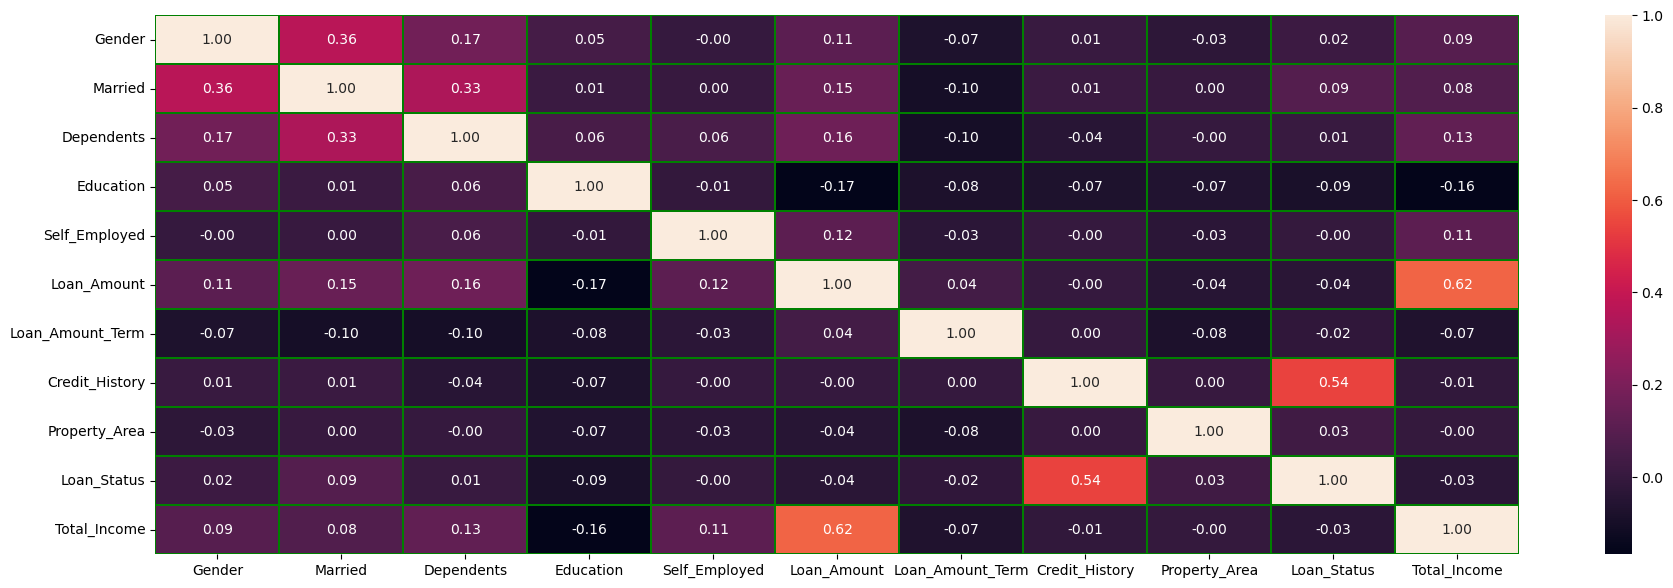

In [37]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="green",fmt='0.2f')

In [38]:
cor["Loan_Status"].sort_values(ascending=True)

Education          -0.085884
Loan_Amount        -0.036416
Total_Income       -0.031271
Loan_Amount_Term   -0.020974
Self_Employed      -0.003700
Dependents          0.010118
Gender              0.017987
Property_Area       0.032112
Married             0.091478
Credit_History      0.540556
Loan_Status         1.000000
Name: Loan_Status, dtype: float64

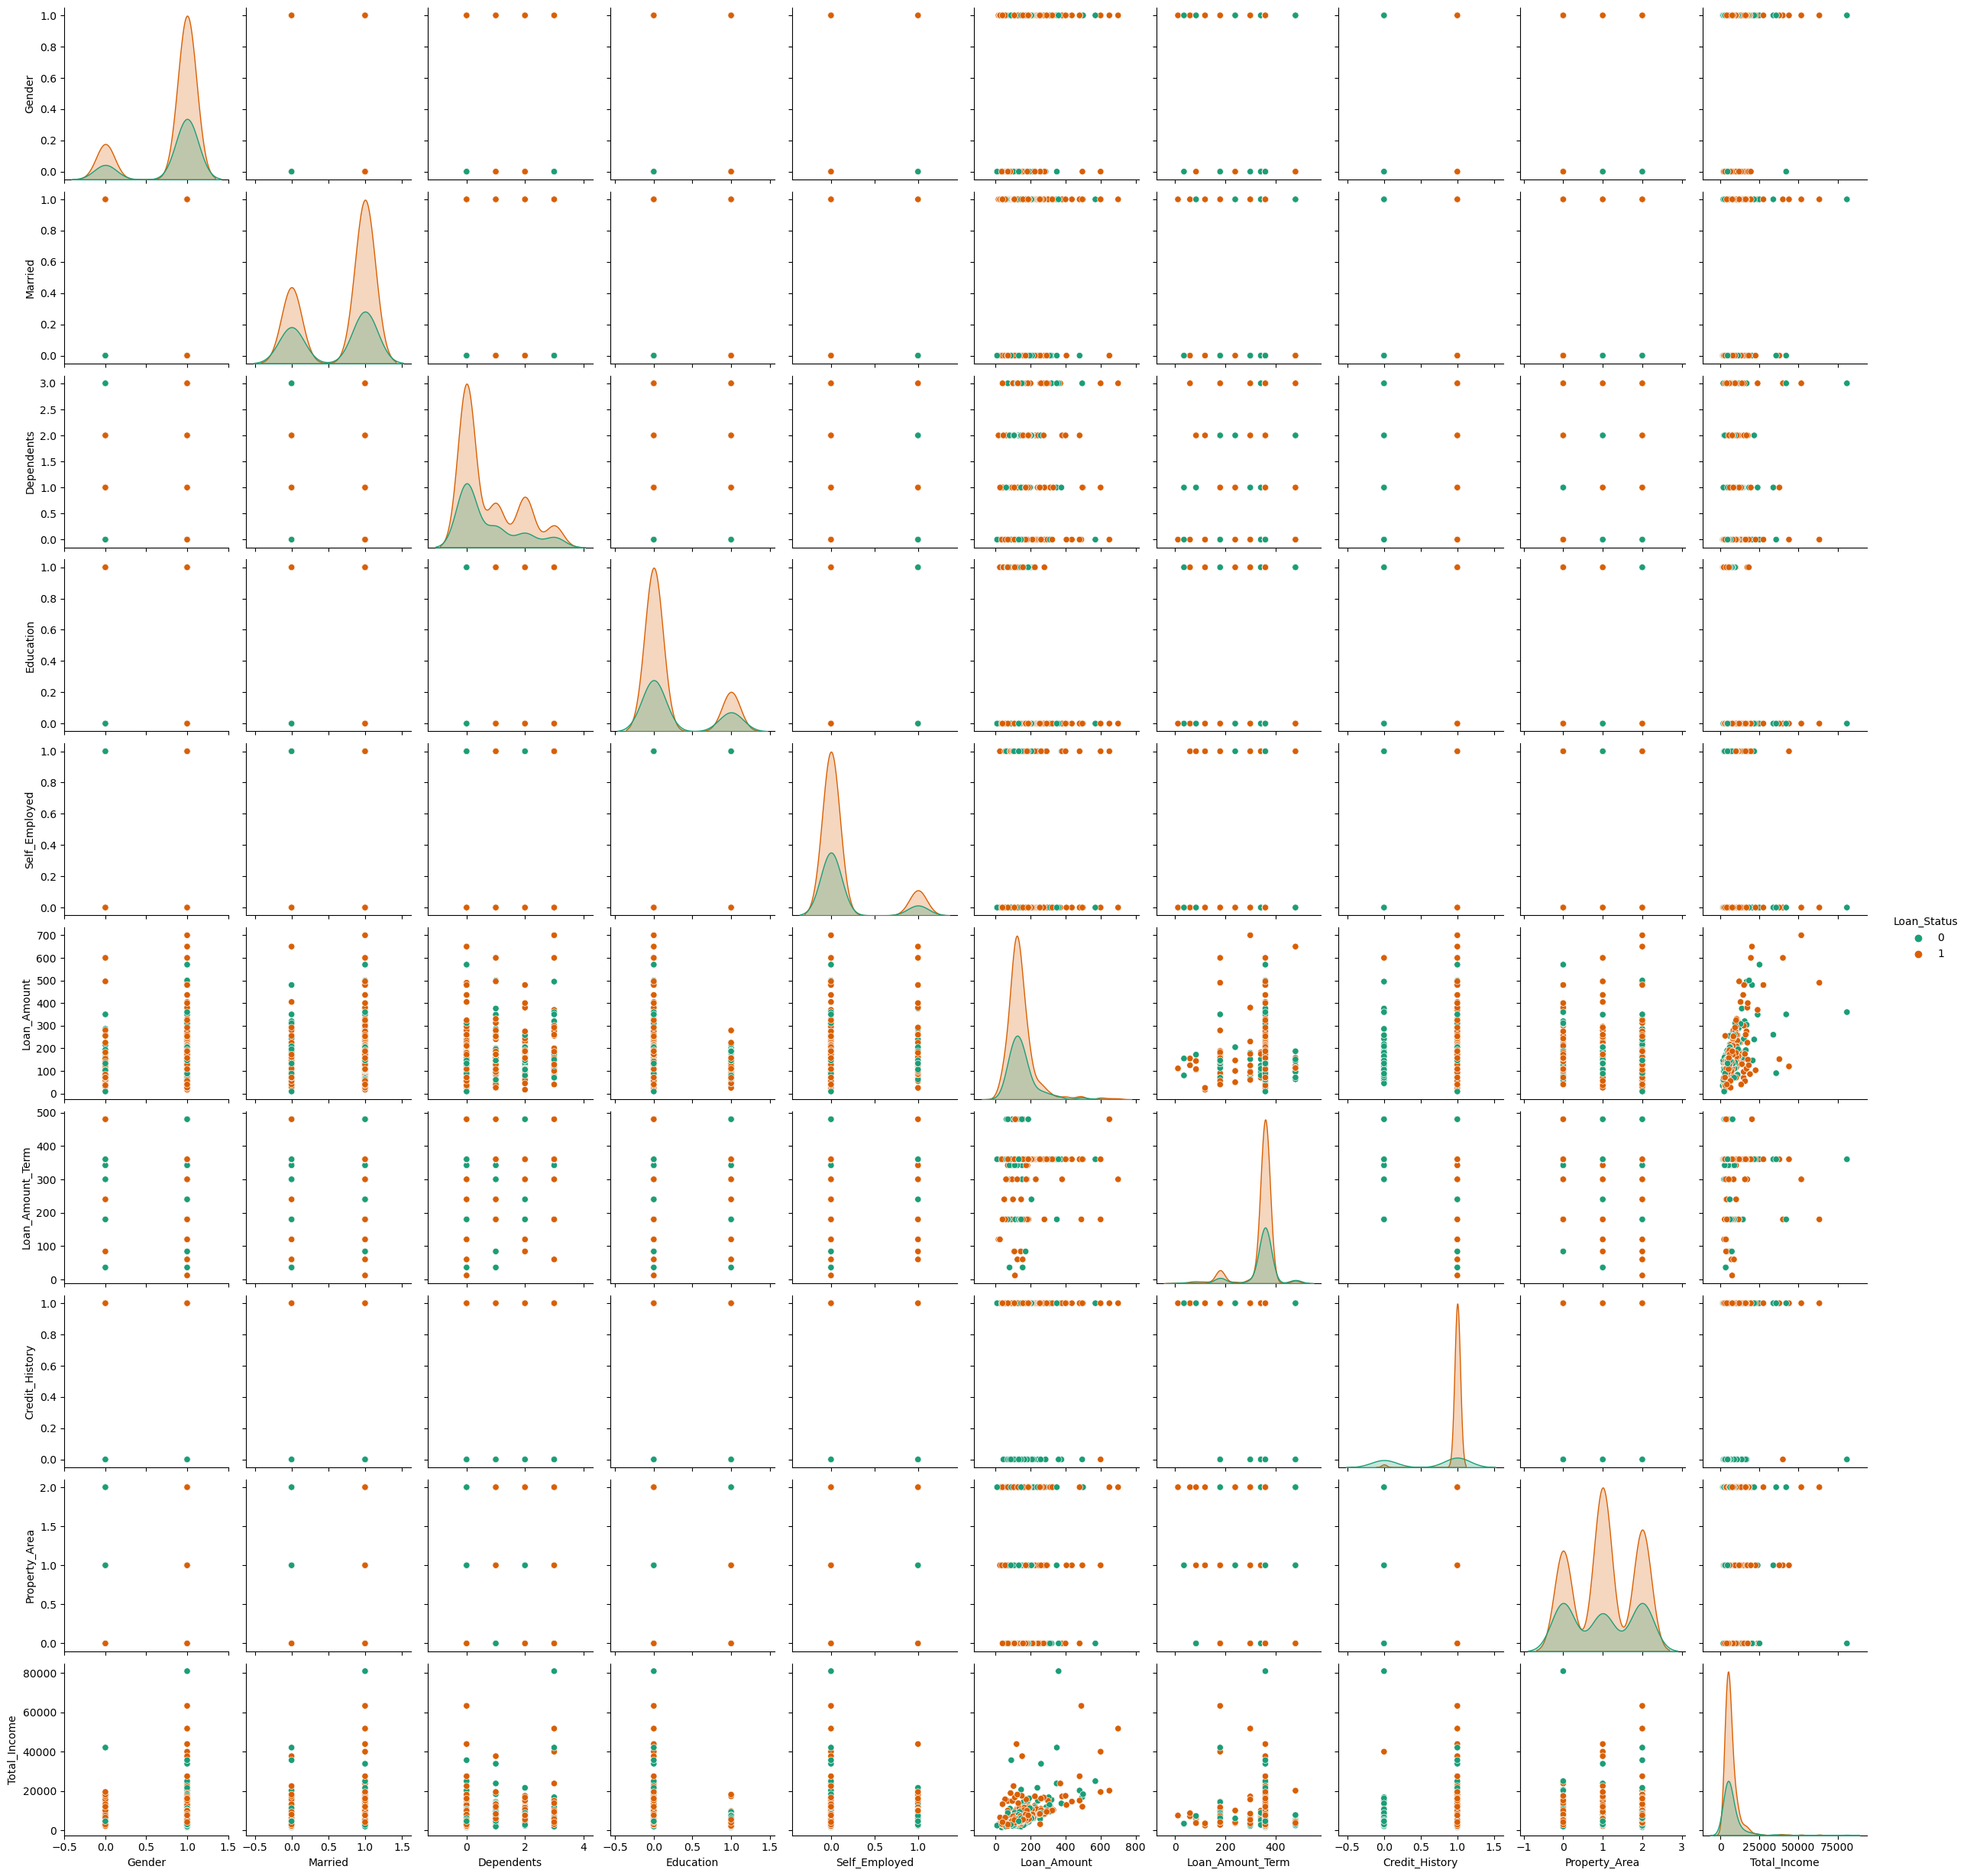

In [39]:
sns.pairplot(df,hue="Loan_Status", palette="Dark2")
plt.show()

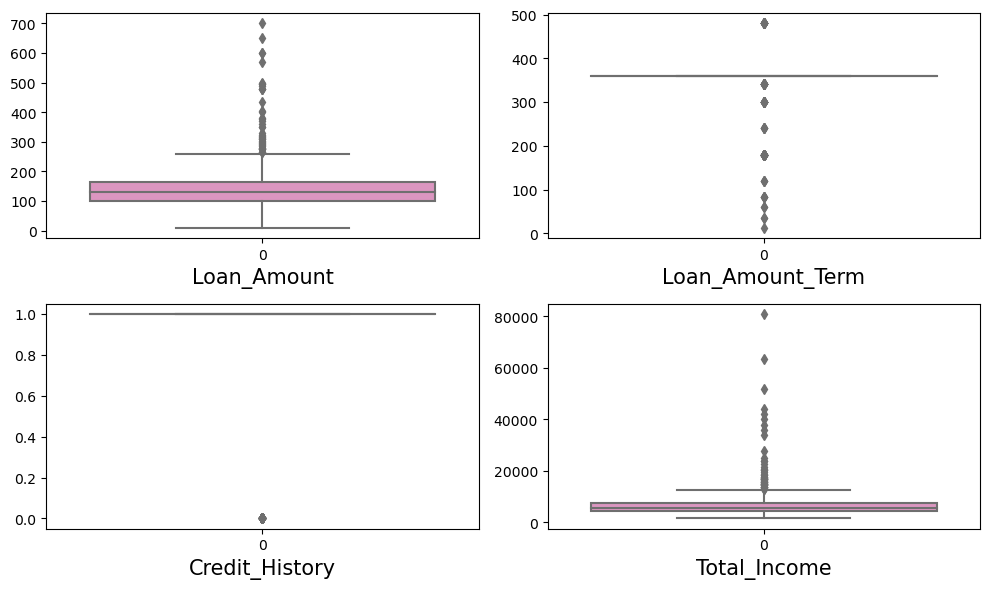

In [40]:
plt.figure(figsize = (10,6), facecolor="white")
plotnumber= 1
for col in numerical_col:
    if plotnumber<=4:
        ax = plt.subplot (2,2,plotnumber)
        sns.boxplot (df[col],palette='Set2_r')
        plt.xlabel(col,fontsize= 15 )
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [41]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 14,  68,  94, 130, 133, 155, 155, 171, 171, 177, 183, 185, 242,
        262, 278, 308, 313, 333, 333, 369, 409, 432, 443, 487, 495, 497,
        506, 506, 523, 525, 546, 561, 575, 581, 585, 600, 604], dtype=int64),
 array([ 6,  6,  6,  5,  6,  5, 10,  5, 10,  5, 10, 10,  6,  6,  5,  5,  6,
         5, 10,  5, 10,  5, 10,  5,  6,  6,  5, 10,  5,  5,  6,  5,  6, 10,
         6, 10,  5], dtype=int64))

In [42]:
df1=df[(z<3).all(axis=1)]
df1

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,1,0,0,0,0,146.412162,360.0,1.0,2,1,5849.0
1,1,1,1,0,0,128.000000,360.0,1.0,0,0,6091.0
2,1,1,0,0,1,66.000000,360.0,1.0,2,1,3000.0
3,1,1,0,1,0,120.000000,360.0,1.0,2,1,4941.0
4,1,0,0,0,0,141.000000,360.0,1.0,2,1,6000.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,71.000000,360.0,1.0,0,1,2900.0
610,1,1,3,0,0,40.000000,180.0,1.0,0,1,4106.0
611,1,1,1,0,0,253.000000,360.0,1.0,2,1,8312.0
612,1,1,2,0,0,187.000000,360.0,1.0,2,1,7583.0


In [43]:
#Using IQR Method
from scipy import stats
IQR = stats.iqr(df)
IQR

100.0

In [44]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

In [45]:
df1 = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df1

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,1,0,0,0,0,146.412162,360.0,1.0,2,1,5849.0
1,1,1,1,0,0,128.000000,360.0,1.0,0,0,6091.0
3,1,1,0,1,0,120.000000,360.0,1.0,2,1,4941.0
4,1,0,0,0,0,141.000000,360.0,1.0,2,1,6000.0
7,1,1,3,0,0,158.000000,360.0,0.0,1,0,5540.0
...,...,...,...,...,...,...,...,...,...,...,...
606,1,1,1,0,0,173.000000,360.0,1.0,1,1,5900.0
607,1,1,2,1,0,157.000000,360.0,1.0,0,1,5398.0
608,1,1,0,0,0,108.000000,360.0,1.0,0,1,5182.0
612,1,1,2,0,0,187.000000,360.0,1.0,2,1,7583.0


In [46]:
df1.skew()

Gender             -1.825220
Married            -0.837541
Dependents          1.138503
Education           1.134868
Self_Employed       2.296774
Loan_Amount         0.209313
Loan_Amount_Term    3.227598
Credit_History     -1.825220
Property_Area       0.089352
Loan_Status        -0.854714
Total_Income        0.458135
dtype: float64

In [47]:
from sklearn.preprocessing import PowerTransformer
from scipy.stats import skew
pt = PowerTransformer(method='yeo-johnson')
df1[['Loan_Amount', 'Loan_Amount_Term', 'Total_Income', 'Credit_History']] = pt.fit_transform(df1[['Loan_Amount', 'Loan_Amount_Term', 'Total_Income', 'Credit_History']])

In [48]:
x=df1.drop("Loan_Status",axis=1)
y=df1["Loan_Status"]

In [49]:
x

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,1,0,0,0,0,0.440956,0.000124,0.442719,2,0.513239
1,1,1,1,0,0,-0.118216,0.000124,0.442719,0,0.741752
3,1,1,0,1,0,-0.363993,0.000124,0.442719,2,-0.515255
4,1,0,0,0,0,0.277476,0.000124,0.442719,2,0.657710
7,1,1,3,0,0,0.788684,0.000124,-2.258770,1,0.196319
...,...,...,...,...,...,...,...,...,...,...
606,1,1,1,0,0,1.234500,0.000124,0.442719,1,0.562755
607,1,1,2,1,0,0.758795,0.000124,0.442719,0,0.040118
608,1,1,0,0,0,-0.736245,0.000124,0.442719,0,-0.211730
612,1,1,2,0,0,1.646591,0.000124,0.442719,2,1.864202


In [50]:
y

0      1
1      0
3      1
4      1
7      0
      ..
606    1
607    1
608    1
612    1
613    0
Name: Loan_Status, Length: 299, dtype: int32

In [51]:
#Using Standard Scalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
X

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,0.442719,-1.500000,-0.690898,-0.583787,-0.375794,0.440956,0.000124,0.442719,1.330604,0.513239
1,0.442719,0.666667,0.316802,-0.583787,-0.375794,-0.118216,0.000124,0.442719,-1.203476,0.741752
2,0.442719,0.666667,-0.690898,1.712954,-0.375794,-0.363993,0.000124,0.442719,1.330604,-0.515255
3,0.442719,-1.500000,-0.690898,-0.583787,-0.375794,0.277476,0.000124,0.442719,1.330604,0.657710
4,0.442719,0.666667,2.332202,-0.583787,-0.375794,0.788684,0.000124,-2.258770,0.063564,0.196319
...,...,...,...,...,...,...,...,...,...,...
294,0.442719,0.666667,0.316802,-0.583787,-0.375794,1.234500,0.000124,0.442719,0.063564,0.562755
295,0.442719,0.666667,1.324502,1.712954,-0.375794,0.758795,0.000124,0.442719,-1.203476,0.040118
296,0.442719,0.666667,-0.690898,-0.583787,-0.375794,-0.736245,0.000124,0.442719,-1.203476,-0.211730
297,0.442719,0.666667,1.324502,-0.583787,-0.375794,1.646591,0.000124,0.442719,1.330604,1.864202


In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
v=variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Values"]=[v(X.values,i) for i in range(len(X.columns))]
vif["Features"]=x.columns
vif

,VIF Values,Features
0,1.177054,Gender
1,1.274994,Married
2,1.158966,Dependents
3,1.035725,Education
4,1.078464,Self_Employed
5,1.221879,Loan_Amount
6,1.036125,Loan_Amount_Term
7,1.018392,Credit_History
8,1.043647,Property_Area
9,1.233855,Total_Income


In [53]:
y.value_counts()

Loan_Status
1    208
0     91
Name: count, dtype: int64

In [55]:
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score,roc_curve
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,ExtraTreesClassifier

from sklearn.model_selection import GridSearchCV

import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

In [57]:
from sklearn.model_selection import train_test_split
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is", maxAccu,"at random_state", maxRS)

Best accuracy is 0.9166666666666666 at random_state 49


In [58]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=39)

In [59]:
print('Size of x_train : ', x_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of x_test : ', x_test.shape)
print('Size of y_test : ', y_test.shape)

Size of x_train :  (239, 10)
Size of y_train :  (239,)
Size of x_test :  (60, 10)
Size of y_test :  (60,)


In [60]:
print('predicted_values:', pred)

predicted_values: [1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1]


In [63]:
# checking accuracy for RandomForestClassifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(classification_report(y_test,predRFC))
#checking cv score for Random Forest classifier
score1=cross_val_score(RFC,x,y)
print(score1)
print(score1.mean())
print("Difference between Accuraccy_Score and CVS is =", accuracy_score(y_test,predRFC)-score1.mean())

0.85
              precision    recall  f1-score   support

           0       0.70      0.54      0.61        13
           1       0.88      0.94      0.91        47

    accuracy                           0.85        60
   macro avg       0.79      0.74      0.76        60
weighted avg       0.84      0.85      0.84        60

[0.81666667 0.76666667 0.76666667 0.88333333 0.83050847]
0.8127683615819208
Difference between Accuraccy_Score and CVS is = 0.037231638418079194


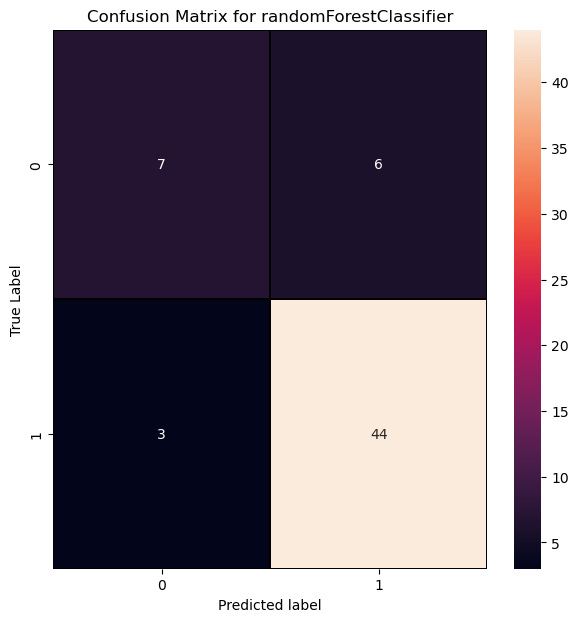

In [64]:
#Lets plot confusion mTatrix for RandomForestClassifier
cm=confusion_matrix(y_test,predRFC)
x_axis_labels=["0","1"]
y_axis_labels= ["0","1"]
f, ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True, linewidths=0.2, linecolor="black",fmt=".0f",ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for randomForestClassifier")
plt.show()

In [65]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(classification_report(y_test,predsvc))
#checking cv score for Support Vector classifier
score2=cross_val_score(svc,x,y)
print(score2)
print(score2.mean())
print("Difference between Accuraccy_Score and CVS is =", accuracy_score(y_test,predsvc)-score2.mean())

0.8666666666666667
              precision    recall  f1-score   support

           0       0.78      0.54      0.64        13
           1       0.88      0.96      0.92        47

    accuracy                           0.87        60
   macro avg       0.83      0.75      0.78        60
weighted avg       0.86      0.87      0.86        60

[0.85       0.76666667 0.81666667 0.85       0.88135593]
0.8329378531073447
Difference between Accuraccy_Score and CVS is = 0.033728813559322


In [67]:
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(classification_report(y_test,predGB))
score3=cross_val_score(GB,x,y)
print(score3)
print(score3.mean())
print("Difference between Accuraccy_Score and CVS is =", accuracy_score(y_test,predGB)-score3.mean())

0.85
              precision    recall  f1-score   support

           0       0.70      0.54      0.61        13
           1       0.88      0.94      0.91        47

    accuracy                           0.85        60
   macro avg       0.79      0.74      0.76        60
weighted avg       0.84      0.85      0.84        60

[0.83333333 0.71666667 0.78333333 0.8        0.79661017]
0.7859887005649718
Difference between Accuraccy_Score and CVS is = 0.06401129943502815


In [69]:
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC=ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(classification_report(y_test,predABC))
#checking cv score for AdaBoosting classifier
score4=cross_val_score(ABC,x,y)
print(score4)
print(score4.mean())
print("Difference between Accuraccy_Score and CVS is =", accuracy_score(y_test,predABC)-score4.mean())

0.8333333333333334
              precision    recall  f1-score   support

           0       0.62      0.62      0.62        13
           1       0.89      0.89      0.89        47

    accuracy                           0.83        60
   macro avg       0.75      0.75      0.75        60
weighted avg       0.83      0.83      0.83        60

[0.81666667 0.73333333 0.81666667 0.81666667 0.84745763]
0.8061581920903954
Difference between Accuraccy_Score and CVS is = 0.02717514124293796


In [70]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(classification_report(y_test,predLR))
#checking cv score for Logistic regresssion
score5=cross_val_score(LR,x,y)
print(score5)
print(score5.mean())
print("Difference between Accuraccy_Score and CVS is =", accuracy_score(y_test,predLR)-score5.mean())

0.8666666666666667
              precision    recall  f1-score   support

           0       0.78      0.54      0.64        13
           1       0.88      0.96      0.92        47

    accuracy                           0.87        60
   macro avg       0.83      0.75      0.78        60
weighted avg       0.86      0.87      0.86        60

[0.85       0.78333333 0.81666667 0.85       0.86440678]
0.8328813559322035
Difference between Accuraccy_Score and CVS is = 0.033785310734463225


In [72]:
BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(classification_report(y_test,predBC))
#checking cv score for Bagging classifier
score6=cross_val_score(BC,x,y)
print(score6)
print(score6.mean())
print("Difference between Accuraccy_Score and CVS is =", accuracy_score(y_test,predBC)-score6.mean())

0.75
              precision    recall  f1-score   support

           0       0.44      0.54      0.48        13
           1       0.86      0.81      0.84        47

    accuracy                           0.75        60
   macro avg       0.65      0.67      0.66        60
weighted avg       0.77      0.75      0.76        60

[0.75       0.66666667 0.68333333 0.8        0.77966102]
0.7359322033898305
Difference between Accuraccy_Score and CVS is = 0.014067796610169547


In [73]:
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(classification_report(y_test,predET))
#checking cv score for Extra Tree classifier
score7=cross_val_score(ET,x,y)
print(score7)
print(score7.mean())
print("Difference between Accuraccy_Score and CVS is =", accuracy_score(y_test,predET)-score7.mean())

0.7666666666666667
              precision    recall  f1-score   support

           0       0.47      0.54      0.50        13
           1       0.87      0.83      0.85        47

    accuracy                           0.77        60
   macro avg       0.67      0.68      0.67        60
weighted avg       0.78      0.77      0.77        60

[0.78333333 0.7        0.78333333 0.8        0.77966102]
0.7692655367231638
Difference between Accuraccy_Score and CVS is = -0.00259887005649706


In [75]:
from sklearn.tree import DecisionTreeClassifier
DTC =DecisionTreeClassifier()
DTC.fit(x_train,y_train)
predDTC=DTC.predict(x_test)
print(accuracy_score(y_test,predDTC))
print(classification_report(y_test,predDTC))
score8=cross_val_score(DTC,x,y)
print(score8)
print(score8.mean())
print("Difference between Accuraccy_Score and CVS is =", accuracy_score(y_test,predDTC)-score8.mean())

0.75
              precision    recall  f1-score   support

           0       0.44      0.54      0.48        13
           1       0.86      0.81      0.84        47

    accuracy                           0.75        60
   macro avg       0.65      0.67      0.66        60
weighted avg       0.77      0.75      0.76        60

[0.73333333 0.6        0.78333333 0.75       0.6779661 ]
0.7089265536723164
Difference between Accuraccy_Score and CVS is = 0.041073446327683616


In [76]:
knn =KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(classification_report(y_test,predknn))
score9=cross_val_score(knn,x,y)
print(score9)
print(score9.mean())
print("Difference between Accuraccy_Score and CVS is =", accuracy_score(y_test,predknn)-score9.mean())

0.8
              precision    recall  f1-score   support

           0       0.54      0.54      0.54        13
           1       0.87      0.87      0.87        47

    accuracy                           0.80        60
   macro avg       0.71      0.71      0.71        60
weighted avg       0.80      0.80      0.80        60

[0.85       0.71666667 0.8        0.83333333 0.83050847]
0.8061016949152542
Difference between Accuraccy_Score and CVS is = -0.006101694915254141


In [77]:
model=[('RandomForestClassifier',accuracy_score(y_test,predRFC),score1.mean(),accuracy_score(y_test,predRFC)-score1.mean()),
      ('SVC',accuracy_score(y_test,predsvc),score2.mean(),accuracy_score(y_test,predsvc)-score2.mean()),
      ('GradientBoostingClassifier',accuracy_score(y_test,predGB),score3.mean(),accuracy_score(y_test,predGB)-score3.mean()),
      ('AdaBoostClassifier',accuracy_score(y_test,predABC),score4.mean(),accuracy_score(y_test,predABC)-score4.mean()),
      ('LogisticRegression',accuracy_score(y_test,predLR),score5.mean(),accuracy_score(y_test,predLR)-score5.mean()),
      ('BaggingClassifier',accuracy_score(y_test,predBC),score6.mean(),accuracy_score(y_test,predBC)-score6.mean()),
      ('ExtraTreesClassifier',accuracy_score(y_test,predET),score7.mean(),accuracy_score(y_test,predET)-score7.mean()),
    ('DecisionTreesClassifier',accuracy_score(y_test,predDTC),score8.mean(),accuracy_score(y_test,predDTC)-score8.mean()),
    ('KNeighborsClassifier',accuracy_score(y_test,predknn),score9.mean(),accuracy_score(y_test,predknn)-score9.mean())
      ]

In [78]:
Model = pd.DataFrame(data = model, columns=['Model','Accuracy Score','Cross Validation', 'Difference'])
Model

,Model,Accuracy Score,Cross Validation,Difference
0,RandomForestClassifier,0.850000,0.812768,0.037232
1,SVC,0.866667,0.832938,0.033729
2,GradientBoostingClassifier,0.850000,0.785989,0.064011
3,AdaBoostClassifier,0.833333,0.806158,0.027175
4,LogisticRegression,0.866667,0.832881,0.033785
5,BaggingClassifier,0.750000,0.735932,0.014068
6,ExtraTreesClassifier,0.766667,0.769266,-0.002599
7,DecisionTreesClassifier,0.750000,0.708927,0.041073
8,KNeighborsClassifier,0.800000,0.806102,-0.006102


# Hyper Parameter Tuning

In [79]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {'criterion': ['gini','entropy'],
              'random_state':[10,50,1000],
    'n_estimators': [50, 100, 200, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'bootstrap': [False, True]
}

In [80]:
random_search = RandomizedSearchCV(estimator=ET, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=39)

In [81]:
random_search.fit(x, y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [False, True],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [50, 100, 200, 400,
                                                         500],
                                        'random_state': [10, 50, 1000]},
                   random_state=39, verbose=2)

In [82]:
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'random_state': 10, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 'log2', 'max_depth': 30, 'criterion': 'entropy', 'bootstrap': True}
Best Score: 0.8328813559322035


In [83]:
bestetc = random_search.best_estimator_

In [84]:
ypred = bestetc.predict(x)
print(classification_report(y, ypred))

              precision    recall  f1-score   support

           0       0.92      0.49      0.64        91
           1       0.82      0.98      0.89       208

    accuracy                           0.83       299
   macro avg       0.87      0.74      0.77       299
weighted avg       0.85      0.83      0.82       299



In [85]:
Final_model=ExtraTreesClassifier(random_state=39, n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features='sqrt', max_depth=40, criterion= 'gini', bootstrap= False)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

83.33333333333334


# Ploting ROC AUC Curve

In [86]:
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import RocCurveDisplay

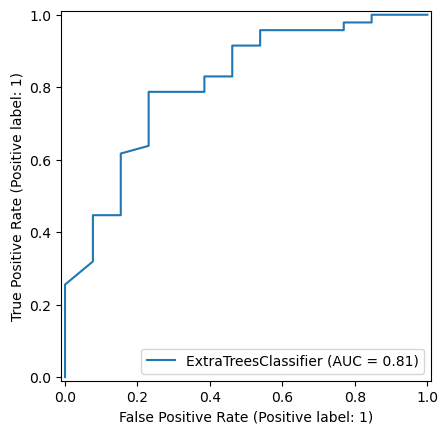

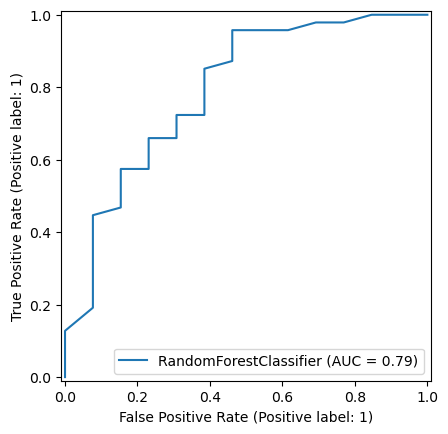

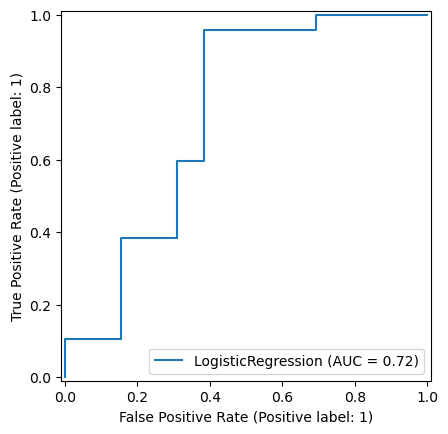

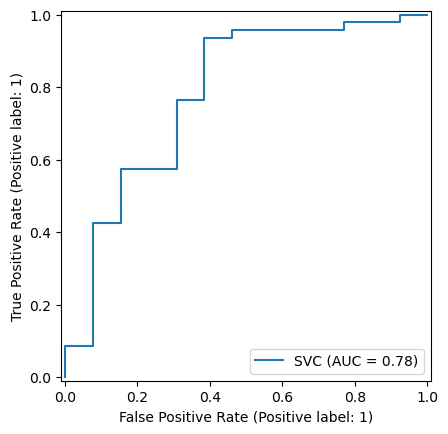

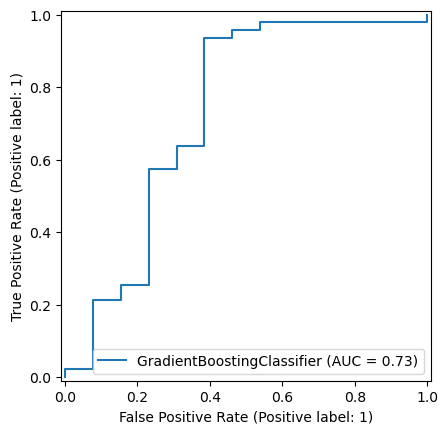

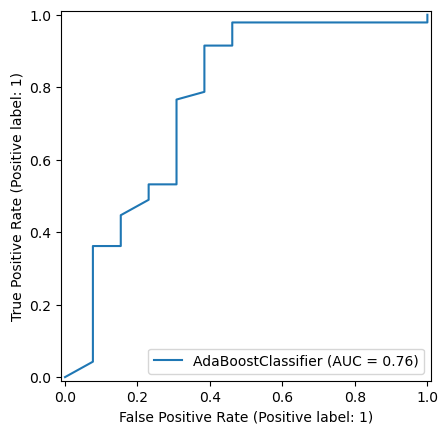

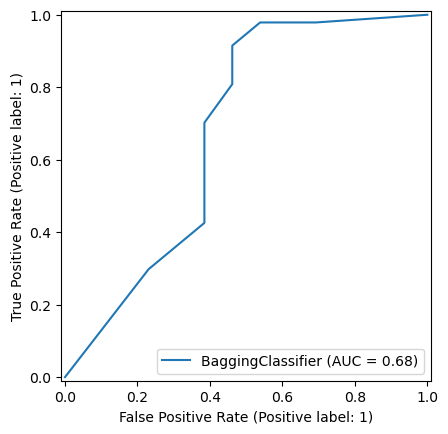

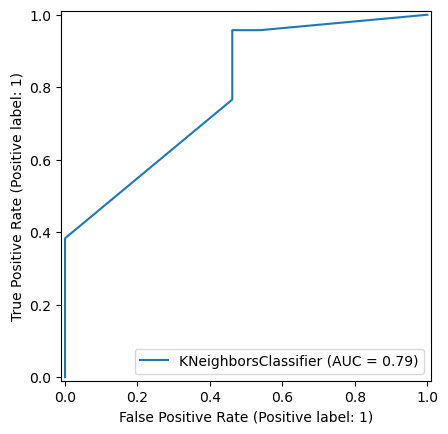

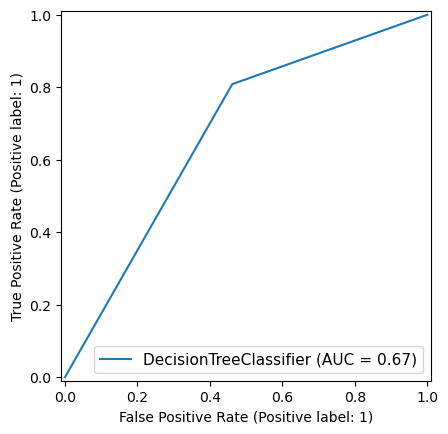

In [87]:
display= RocCurveDisplay.from_estimator(ET,x_test,y_test) 
RocCurveDisplay.from_estimator(RFC,x_test,y_test)
RocCurveDisplay.from_estimator(LR,x_test,y_test)
RocCurveDisplay.from_estimator(svc,x_test,y_test)
RocCurveDisplay.from_estimator(GB,x_test,y_test)
RocCurveDisplay.from_estimator(ABC,x_test,y_test)
RocCurveDisplay.from_estimator(BC,x_test,y_test)
RocCurveDisplay.from_estimator(knn,x_test,y_test)
RocCurveDisplay.from_estimator(DTC,x_test,y_test)

plt.legend(prop={'size':11},loc='lower right')
plt.show()

# Plotting ROC and compare AUC for the Best Model

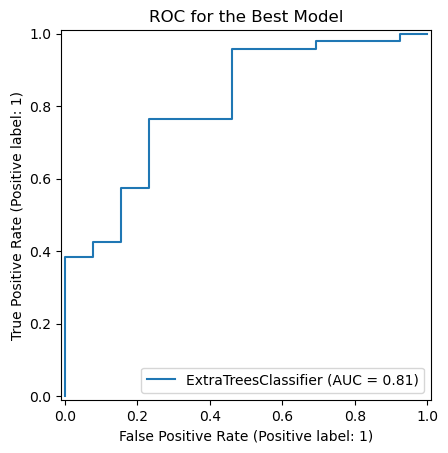

In [88]:
RocCurveDisplay.from_estimator(Final_model,x_test,y_test)
plt.title("ROC for the Best Model")
plt.show()

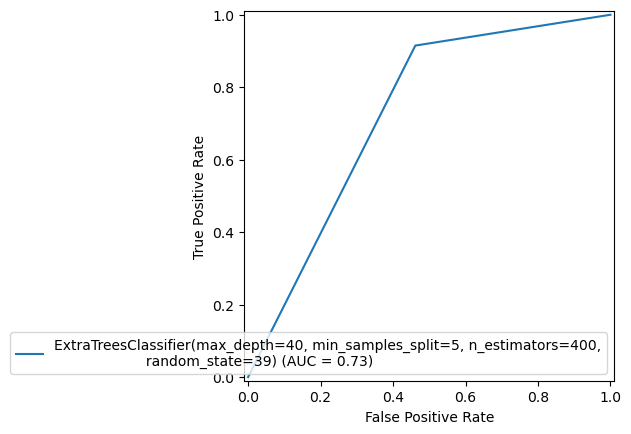

In [89]:
from sklearn import metrics
fpr,tpr,thesholds=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=Final_model)
display.plot()

In [90]:
#saving the model using .pkl
import joblib
joblib.dump(Final_model,"LoanPrediction.pkl")

['LoanPrediction.pkl']

In [91]:
#lets load the saved model and get the predictions
model=joblib.load('LoanPrediction.pkl')

#Prediction
prediction=model.predict(x_test)
prediction

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0])

In [92]:
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=prediction
df["Original"]=a
df

,Predicted,Original
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,0
7,1,1
8,1,0
9,0,1
